In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
# Cargar los datos
df = pd.read_csv("data/data_peliculas_transformado_filtrado.csv")
df.head()

,Título,URL,Procesado,Nota,Votos,Año,Reparto,Director,Compañías,Coproducción,Géneros,Premios,Presupuesto,Ingresos,Protagonistas
0,El verdugo,https://www.filmaffinity.com/es/film411856.html,Sí,8.2,41447.0,1963-01-01,"['José Isbert', 'Nino Manfredi', 'Emma Penella...",['Luis García Berlanga'],"['Naga Films', 'Zabra Films']",['España-Italia'],"['Comedia', 'Sátira', 'Comedia negra', 'Pelícu...",['1963: Festival de Venecia: Premios FIPRESCI'],0.0,0.0,José Isbert
1,Los santos inocentes,https://www.filmaffinity.com/es/film879812.html,Sí,8.1,44470.0,1984-01-01,"['Alfredo Landa', 'Francisco Rabal', 'Juan Die...",['Mario Camus'],"['Ganesh', 'RTVE']",[],"['Drama', 'Drama social', 'Vida rural', 'Años ...",['1984: Cannes: Mejor Actor (ex aequo: Francis...,0.0,3149062.0,Alfredo Landa
2,Plácido,https://www.filmaffinity.com/es/film895672.html,Sí,8.1,20396.0,1961-01-01,"['Cassen', 'José Luis López Vázquez', 'Elvira ...",['Luis García Berlanga'],"['Jet Films', 'Alfredo Matas']",[],"['Comedia', 'Pobreza', 'Navidad', 'Sátira']",['1961: Nominada al Oscar: Mejor película de h...,0.0,0.0,Cassen
3,Viridiana,https://www.filmaffinity.com/es/film123112.html,Sí,8.1,28771.0,1961-01-01,"['Silvia Pinal', 'Fernando Rey', 'Francisco Ra...",['Luis Buñuel'],"['Films 59', 'Uninci']",['España-México'],"['Drama', 'Religión', 'Película de culto']",['1961: Festival de Cannes: Palma de Oro (ex-a...,0.0,679244.0,Silvia Pinal
4,"Bienvenido, Míster Marshall",https://www.filmaffinity.com/es/film435869.html,Sí,8.0,31421.0,1953-01-01,"['José Isbert', 'Lolita Sevilla', 'Manolo Morá...",['Luis García Berlanga'],['Uninci'],[],"['Comedia', 'Sátira']",['1953: Festival de Cannes: Premio Internacion...,0.0,0.0,José Isbert


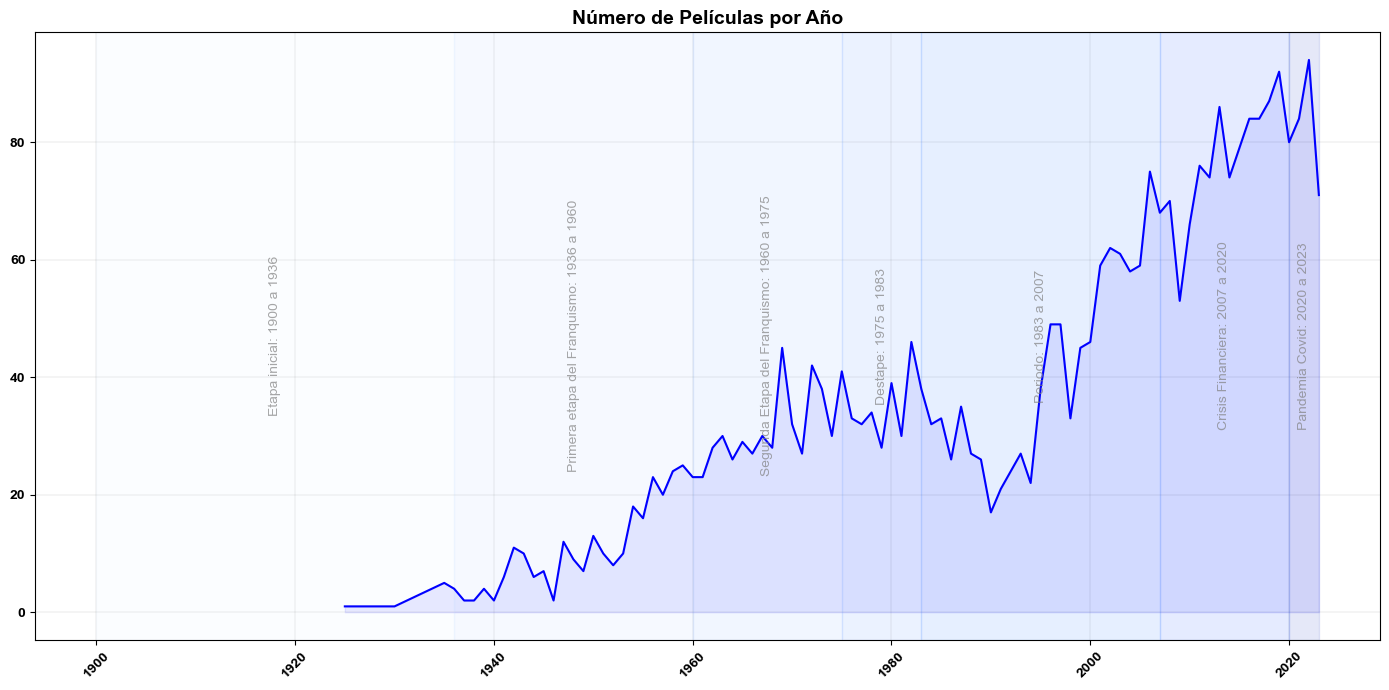

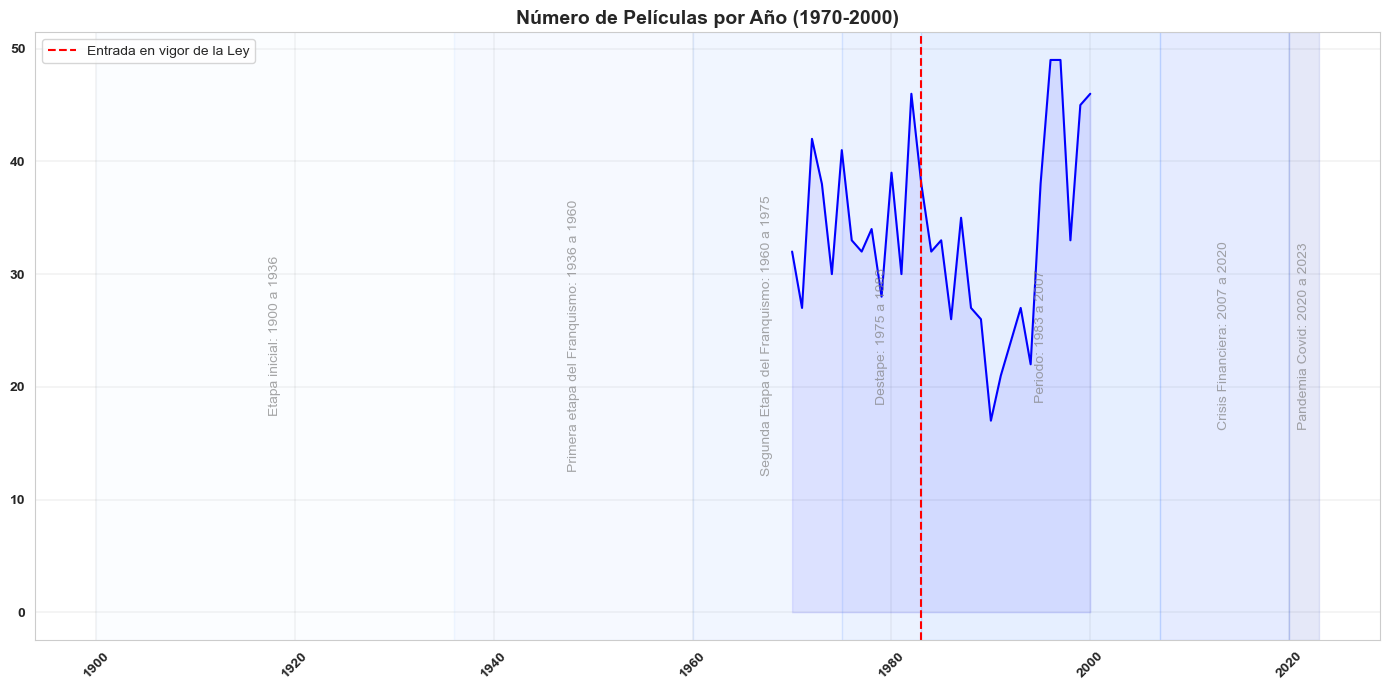

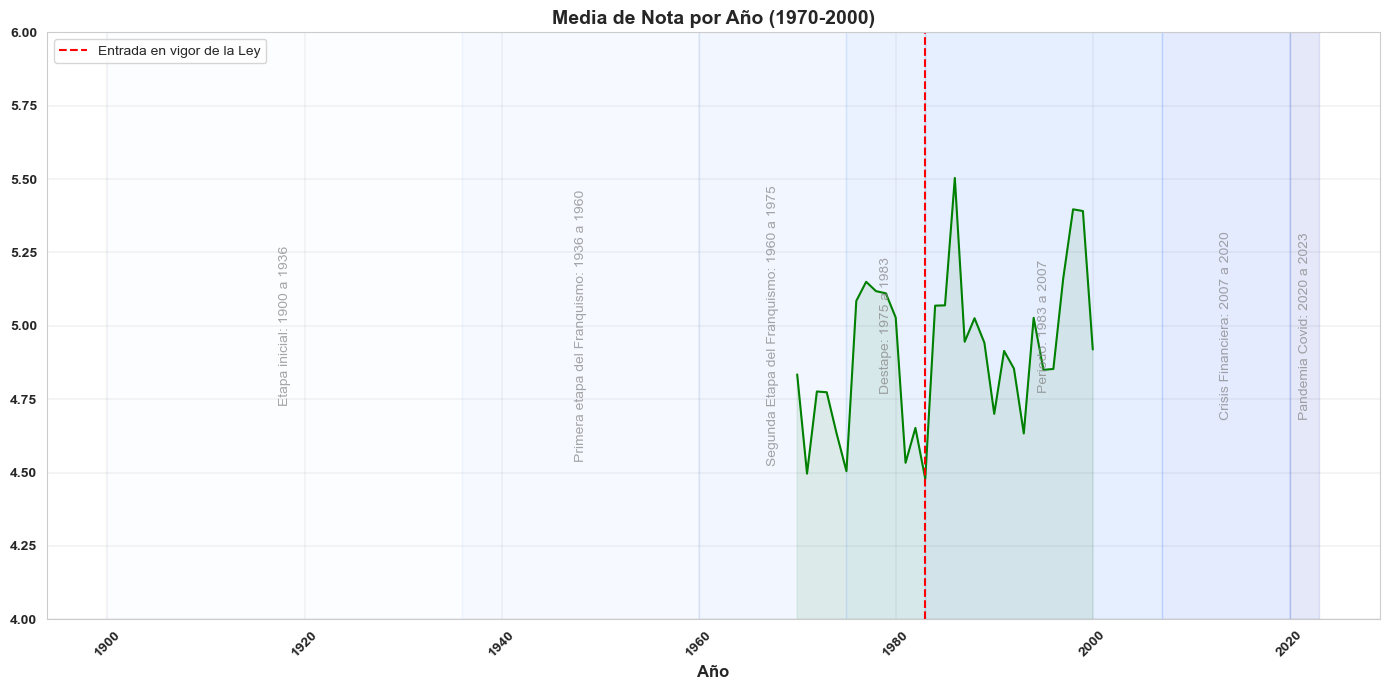

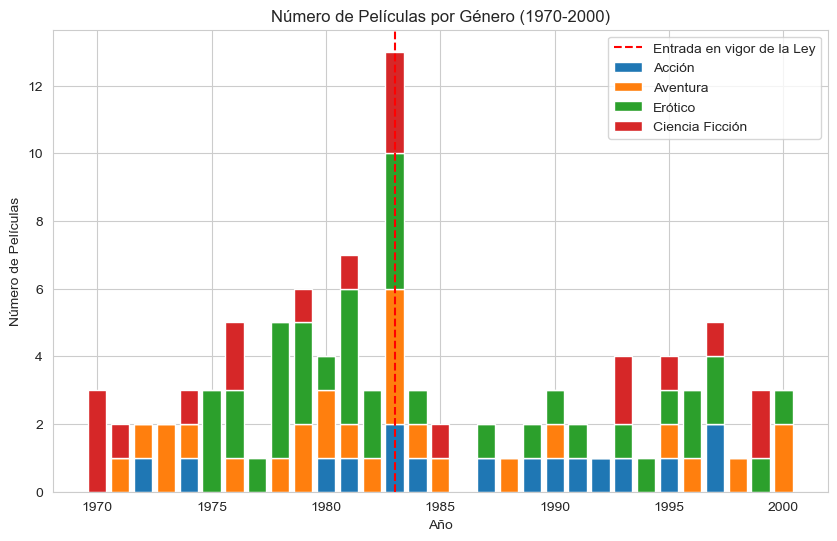

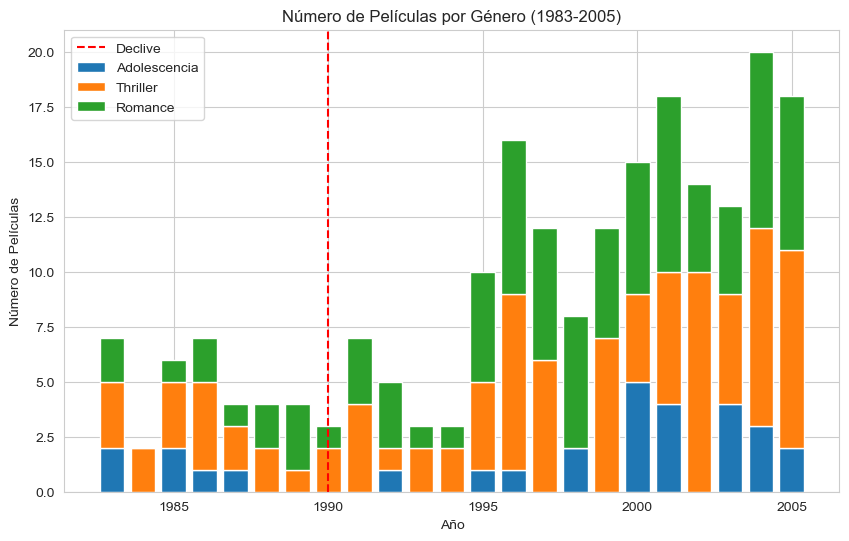

In [3]:
# Definir la función para aplicar el estilo estándar a las gráficas
def apply_standard_style(plot):
    sns.set_style("whitegrid")
    plot.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plot.set_axisbelow(True)
    plot.set_xlabel(plot.get_xlabel(), fontsize=12, weight='bold')
    plot.set_ylabel(plot.get_ylabel(), fontsize=12, weight='bold')
    plot.set_title(plot.get_title(), fontsize=14, weight='bold')
    for tick in plot.get_xticklabels():
        tick.set_rotation(45)
        tick.set_fontsize(10)
        tick.set_weight('bold')
    for tick in plot.get_yticklabels():
        tick.set_fontsize(10)
        tick.set_weight('bold')
    plt.tight_layout()

# Función para añadir sombreado de fondo y líneas divisorias con anotaciones verticales
def add_background_shading_and_dividers(plot):
    # Definir los períodos y sus etiquetas
    periods = [
        (1900, 1936, 'Etapa inicial: 1900 a 1936'),
        (1936, 1960, 'Primera etapa del Franquismo: 1936 a 1960'),
        (1960, 1975, 'Segunda Etapa del Franquismo: 1960 a 1975'),
        (1975, 1983, 'Destape: 1975 a 1983'),
        (1983, 2007, 'Periodo: 1983 a 2007'),
        (2007, 2020, 'Crisis Financiera: 2007 a 2020'),
        (2020, 2023, 'Pandemia Covid: 2020 a 2023')
    ]
    
    # Colores para el sombreado de fondo
    colors = ['#DDEEFF', '#AACCFF', '#77AAFF', '#4488FF', '#1166FF', '#0044FF', '#0022BB']
    
    # Aplicar el sombreado de fondo y las anotaciones
    for i, (start, end, label) in enumerate(periods):
        color = colors[i % len(colors)]
        plot.axvspan(start, end, color=color, alpha=0.1)
        mid_point = (start + end) / 2
        ylim = plot.get_ylim()
        vertical_position = ylim[0] + (ylim[1] - ylim[0]) / 2
        plot.text(mid_point, vertical_position, label, ha='center', va='center', rotation='vertical', color='grey', alpha=0.7)

# Convertir 'Año' a tipo datetime y extraer el año
df['Año'] = pd.to_datetime(df['Año'], errors='coerce')
df.dropna(subset=['Año'], inplace=True)  # Eliminar filas con fechas inválidas
df['Año'] = df['Año'].dt.year

# Gráfico 1: Número de Películas por Año
plt.figure(figsize=(14, 7))
data = df['Año'].value_counts().sort_index()
plot = sns.lineplot(x=data.index, y=data.values, color='blue')
plot.set_title('Número de Películas por Año')

# Rellenar debajo de la línea con color azul
plt.fill_between(data.index, data.values, color='blue', alpha=0.09)

# Aplicar estilo, sombreado de fondo y líneas divisorias
add_background_shading_and_dividers(plot)
apply_standard_style(plot)
plt.show()

# Gráfico 2: Número de Películas por Año (1970-2000)
plt.figure(figsize=(14, 7))
data = df[(df['Año'] >= 1970) & (df['Año'] <= 2000)]['Año'].value_counts().sort_index()
plot = sns.lineplot(x=data.index, y=data.values, color='blue')
plot.set_title('Número de Películas por Año (1970-2000)')

# Rellenar debajo de la línea con color azul
plt.fill_between(data.index, data.values, color='blue', alpha=0.09)

# Aplicar estilo, sombreado de fondo y líneas divisorias
add_background_shading_and_dividers(plot)
apply_standard_style(plot)

# Marca en rojo en 1983
plt.axvline(x=1983, color='red', linestyle='--', label='Entrada en vigor de la Ley')

# Añadir leyenda
plot.legend()

plt.show()

# Gráfico 2: Media de Nota por Año (1970-2000) con escala en el eje y de 4 a 10
plt.figure(figsize=(14, 7))
media_nota_por_año = df[(df['Año'] >= 1970) & (df['Año'] <= 2000)].groupby('Año')['Nota'].mean()
plot = sns.lineplot(x=media_nota_por_año.index, y=media_nota_por_año.values, color='green')
plot.set_title('Media de Nota por Año (1970-2000)')

# Rellenar debajo de la línea con color verde
plt.fill_between(media_nota_por_año.index, media_nota_por_año.values, color='green', alpha=0.09)

# Ajustar la escala en el eje y
plt.ylim(4, 6)

# Aplicar estilo, sombreado de fondo y líneas divisorias
add_background_shading_and_dividers(plot)
apply_standard_style(plot)

# Marca en rojo en 1983
plt.axvline(x=1983, color='red', linestyle='--', label='Entrada en vigor de la Ley')

# Añadir leyenda
plot.legend()

plt.show()

#Gráfico 4 Número de Películas por Género (1970-2000)
# Filtrar las películas por el rango de años
filtered_df = df[(df['Año'] >= 1970) & (df['Año'] <= 2000)]

# Lista de géneros de interés
generos_interes = ['Acción', 'Aventura', 'Erótico', 'Ciencia Ficción']

# Crear un DataFrame con una columna por cada género
genre_counts = {genero: [] for genero in generos_interes}

for year in range(1970, 2001):
    for genero in generos_interes:
        count = filtered_df[filtered_df['Géneros'].str.contains(genero, case=False) & (filtered_df['Año'] == year)].shape[0]
        genre_counts[genero].append(count)

genre_counts_df = pd.DataFrame(genre_counts)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
bottom = None

for genero in generos_interes:
    plt.bar(range(1970, 2001), genre_counts_df[genero], label=genero, bottom=bottom)
    if bottom is None:
        bottom = genre_counts_df[genero]
    else:
        bottom = bottom + genre_counts_df[genero]

# Añadir una marca roja en 1983 

# Marca en rojo en 1983
plt.axvline(x=1983, color='red', linestyle='--', label='Entrada en vigor de la Ley')

plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Género (1970-2000)')
plt.grid(True)
plt.legend()
plt.show()

#Gráfico 5 Número de Películas por Género (1983-2005
# Filtrar las películas por el rango de años y géneros de interés
filtered_df = df[(df['Año'] >= 1983) & (df['Año'] <= 2005)]
generos_interes = ['Adolescencia', 'Thriller', 'Romance']

# Crear un DataFrame con una columna por cada género
genre_counts = {genero: [] for genero in generos_interes}

for year in range(1983, 2006):
    for genero in generos_interes:
        count = filtered_df[filtered_df['Géneros'].str.contains(genero, case=False) & (filtered_df['Año'] == year)].shape[0]
        genre_counts[genero].append(count)

genre_counts_df = pd.DataFrame(genre_counts)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
bottom = None

for genero in generos_interes:
    plt.bar(range(1983, 2006), genre_counts_df[genero], label=genero, bottom=bottom)
    if bottom is None:
        bottom = genre_counts_df[genero]
    else:
        bottom = bottom + genre_counts_df[genero]

# Añadir una marca roja en 1983
plt.axvline(x=1990, color='red', linestyle='--', label='Declive')

plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.title('Número de Películas por Género (1983-2005)')
plt.grid(True)
plt.legend()
plt.show()



In [34]:
# Filtrar películas en los géneros 'Adolescencia', 'Thriller' y 'Romance' entre 1990 y 2023
filtered_movies = df[(df['Año'] >= 1990) & (df['Año'] <= 2023) & (df['Géneros'].str.contains('Adolescencia|Thriller|Romance', case=False, regex=True))]

# Calcular la ponderación
filtered_movies['Ponderacion'] = filtered_movies['Nota'] * filtered_movies['Votos']

# Ordenar las películas por ponderación en orden descendente y seleccionar las tres principales
top_weighted_movies = filtered_movies.sort_values(by='Ponderacion', ascending=False).head(3)

# Mostrar las tres películas principales con sus títulos, años y géneros
top_weighted_movies[['Título', 'Año', 'Géneros']]

C:\Users\oscar\AppData\Local\Temp\ipykernel_12692\1816554361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['Ponderacion'] = filtered_movies['Nota'] * filtered_movies['Votos']


,Título,Año,Géneros
11,Celda 211,2009,"['Thriller', 'Drama', 'Drama carcelario', 'ETA']"
50,El laberinto del fauno,2006,"['Fantástico', 'Drama', 'Thriller', 'Vida rura..."
10,Tesis,1996,"['Intriga', 'Thriller', 'Cine dentro del cine'..."


In [35]:
# Filtrar películas de géneros de interés antes de 1983
filtered_movies = df[(df['Año'] <= 1983) & (df['Géneros'].str.contains('|'.join(generos_interes), case=False, regex=True))]

# Calcular la ponderación
filtered_movies['Ponderacion'] = filtered_movies['Nota'] * filtered_movies['Votos']

# Ordenar las películas por ponderación en orden descendente y seleccionar las tres principales
top_weighted_movies = filtered_movies.sort_values(by='Ponderacion', ascending=False).head(3)

# Mostrar las tres películas principales
top_weighted_movies[['Título', 'Año', 'Géneros', 'Votos', 'Nota', 'Ponderacion']]

C:\Users\oscar\AppData\Local\Temp\ipykernel_12692\608157598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['Ponderacion'] = filtered_movies['Nota'] * filtered_movies['Votos']


,Título,Año,Géneros,Votos,Nota,Ponderacion
9,El Sur,1983,"['Drama', 'Familia', 'Infancia', 'Adolescencia...",15610.0,7.7,120197.0
61,¿Quién puede matar a un niño?,1976,"['Terror', 'Intriga', 'Thriller', 'Infancia', ...",13377.0,7.2,96314.4
187,El pico,1983,"['Drama', 'Drogas', 'Adolescencia', 'Cine quin...",9987.0,6.7,66912.9
